In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# <font size="5" color="red"><b>ch3. 분류분석</b></font>

# 1절. 분류분석 개요

## 1-1 분류분석이란?
    * 타겟변수가 categorical 변수인 분석
        - 수업ex. mnist 숫자 예측, iris 분류예측, 와인등급예측, 질병예측
        - ex. 고객등급예측, 휴면고객예측,상품구매예측, 보험사기예측...
    * sklearn 패키지 : 예제데이터셋, 전처리, 머신러닝 모형 

## 1-2 샘플용 데이터셋 접근
### load계열(패키지 내에 데이터있음)
    - load_iris(), load_boston(),load_disabets(),...
    
### fetch계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
    - fetch_openml(), fetch_rov1(로이터 뉴스 말뭉치)
    
### make계열(가상의 데이터 생성)
    - make_classification() : 분류분석용 데이터 생성
    - make_regression()     : 회귀분석용 데이터 생성
    - make_blobs()          : 군집분석용 데이터 생성(타겟변수X)

In [6]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

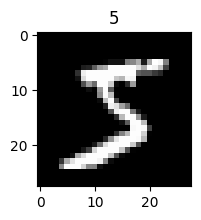

In [8]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [10]:
#fetch 계열
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784",
                     version=1,
                     as_frame=False,  # 데이터프레임으로 받을 지 여부(False:넘파이 배열)
                     parser="auto")
X, y = mnist.data, mnist.target.astype('int')
X.shape,y.shape

((70000, 784), (70000,))

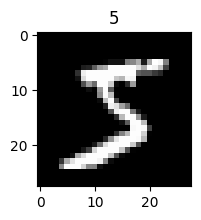

In [11]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X[0].reshape(28,28), cmap='gray') # X[0]=> reshape(28,28) 필요
plt.title(y[0])
plt.show()

# 2절. 분류모형의 종류
- predict()

## 2-1 확률적 모형
    - 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
    - predict_proba() : 각 분류 클래스별 확률을 알려줌(일부 판별함수 모형에 있끼는 함)
    - predict_log_proba() : 확률의 로그값을 알려줌
### 1)  확률적 생성 모형
    - 각 클래스별 특징 데이터 확률분포 추정하는 방식. 소량의 데이터라도 작동.
    - ex. QuadraticDiscriminantAnalysis,MultinomialNB

### 2)  확률적 판별 모형
    - 확률을 계산하는 함수 이용
    - ex. 의사결정 나무, 로지스틱 회귀
    
## 2-2 판별함수 모형
    - 주어진 데이터를 클래스에 따라 다은 영역으로 나누는 경계면을 찾은 후, 이 경계/면을 계산식 => 판별함수
    - decision_function()
    - ex) 퍼셉트론, SVM, MNP(신경망)
=> RandomForest, LGBM,XGBoost,CatBoost 등의 앙상블 모형이 더 많이 쓰임

# 3절. 모형1. 확률적 생성 모형
- 베이즈 정리를 사용하여 확률분포 계산
## 3-1 QDA
- x가 연속형(실수)이면 정규분포라고 가정함

In [14]:
# 샘플 데이터
from sklearn.datasets import make_classification
X,y = make_classification(n_features=2,       # 독립변수 갯수
                         n_informative=2,     # 타겟변수에 영향주는 독립변수 갯수
                         n_redundant=0,       # 타겟변수에 영향을 주지 않는 독립변수 갯수
                         n_clusters_per_class=1, # 클래스 내 서브그룹수 1이면 서브그룹이 없음
                         n_classes=2,         # 타겟 변수의 class수
                         n_samples=100,       # 데이터 갯수(행수)  100이 기본값
                         random_state=9)      # seed값
X.shape,y.shape

((100, 2), (100,))

In [15]:
import numpy as np
np.unique(y)

array([0, 1])

In [16]:
# 타겟변수의 클래스 균형
import pandas as pd
pd.Series(y).value_counts()

0    50
1    50
dtype: int64

In [22]:
# y==1로 분류된 데이터
print(len(X[y==1])),print(len(X[y==0]))
X[y==1].shape, X[y==0].shape

50
50


((50, 2), (50, 2))

In [23]:
y.mean()

0.5

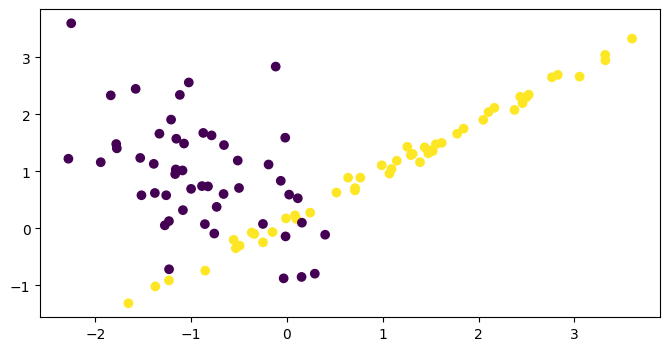

In [25]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [27]:
# (0,0) 기준으로 대칭 구조
X[y==1] = -X[y==0]

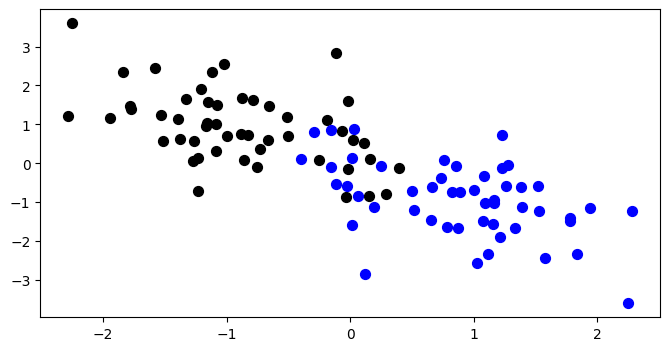

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[y==0,0],y=X[y==0,1],c='k',s=50,edgecolors='k')
plt.scatter(x=X[y==1,0],y=X[y==1,1],c='b',s=50)

In [31]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X,y)

QuadraticDiscriminantAnalysis()

In [41]:
x =[[0.5,0]]     # predict 할때는 2차원 데이터로 / 여러 개 일 때 x = [[0.5,0],[0,0],[-0.5,0]]  
model.predict(x)


array([1])

In [42]:
model.predict_proba(x)

array([[0.16455419, 0.83544581]])

In [43]:
model.classes_  # 분류될 내용

array([0, 1])

In [44]:
y_hat = model.predict(X)
pd.crosstab(y,y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


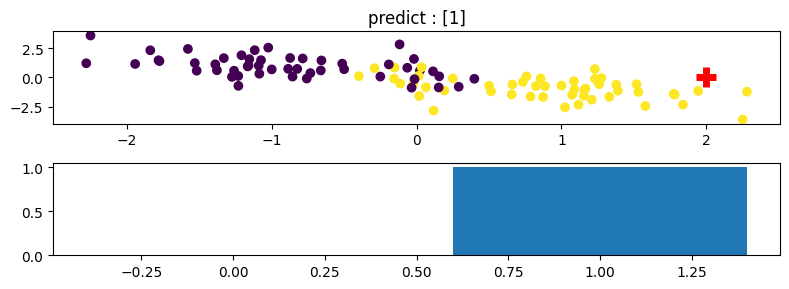

In [59]:
x=[[2,0]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
plt.subplot(211)   # 2행 1열로 subplot에서 첫번째 그래프
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.scatter(x=x[0][0],y=x[0][1],c='r',s=200,marker='+',lw=5)
h= model.predict(x)
plt.title(f'predict : {h}')
plt.subplot(212)
plt.bar(model.classes_,p[0])
plt.tight_layout()
plt.show()

## 3-2 나이브베이지안 모형

In [69]:
#데이터
import seaborn as sns
iris = sns.load_dataset('iris')
# 학습데이터는 numpy배열
X = iris.iloc[:,:-1].values # 넘파이로 변환
y = iris.iloc[:,-1].values   # 라벨인코딩없이 넘파이 배열로 변환
# 모형 생성/학습
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X,y)

MultinomialNB()

In [65]:
X.loc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [71]:
x=[[5.1,3.5,1.4,0.2]]
h = model.predict(x)
p = model.predict_proba(x)[0]
print('예측 : ', h)
print(model.classes_)
print(p)

예측 :  ['setosa']
['setosa' 'versicolor' 'virginica']
[0.75199536 0.16092948 0.08707516]


<BarContainer object of 3 artists>

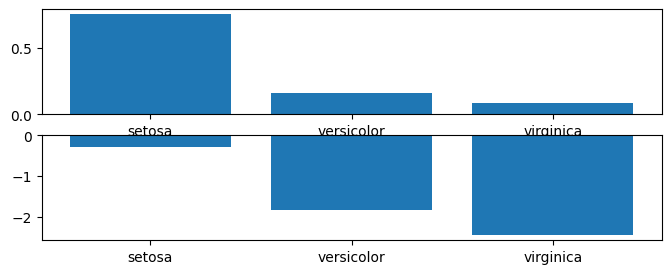

In [77]:
plt.figure(figsize=(8,3))
plt.subplot(211)   # 2행 1열로 subplot에서 첫번째 그래프
plt.bar(model.classes_,model.predict_proba(x)[0])
plt.subplot(2,1,2)
#plt.bar(model.classes_,model.predict_log_proba(x)[0])
plt.bar(model.classes_,np.log(model.predict_proba(x))[0])

# 4절 모형2. 확률적 판별모형
## 4-1. 로지스틱 회귀분석

In [94]:
# 샘플 데이터
from sklearn.datasets import make_classification
X,y = make_classification(n_features=1,       # 독립변수 갯수
                         n_informative=1,     # 타겟변수에 영향주는 독립변수 갯수
                         n_redundant=0,       # 타겟변수에 영향을 주지 않는 독립변수 갯수
                         n_clusters_per_class=1, # 클래스 내 서브그룹수 1이면 서브그룹이 없음
                         n_classes=2,         # 타겟 변수의 class수
                         n_samples=100,       # 데이터 갯수(행수)  100이 기본값
                         random_state=1)      # seed값
X.shape,y.shape

((100, 1), (100,))

In [95]:
plt.scatter(X[:,0],X[:,1],c=y)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [96]:
# 타겟 변수의 클래스 균형'
print(y.mean())

0.5


In [98]:
# 모형
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [99]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
# -3부터 3까지 같은 간격 데이터
xx = np.linspace(-3, 3, 100)
test_x = xx.reshape(-1, 1)
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)

In [ ]:
#prob[:, 0] # 0으로 분류될 확률
#prob[:, 1] # 1로 분류될 확률

<BarContainer object of 2 artists>

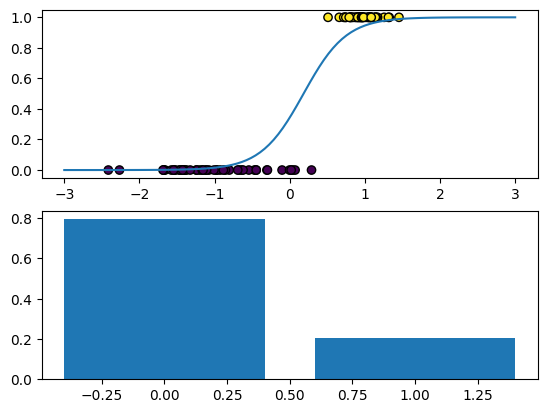

In [103]:
x = [[-0.2]]
plt.subplot(211)
plt.scatter(X,y,c=y,edgecolors='k')
plt.plot(xx,prob[:,1])
plt.subplot(212)
prob_x = model.predict_proba(x)[0]
plt.bar(model.classes_,prob_x)

# =====================================================================================

In [90]:
# -3부터 3 까지 같은 간격 데이터
xx = np.linspace(-3,3,100)
test_x = [(x,x) for x in xx]

#test_x = xx[:,np.newaxis]
#print(test_x)
y_hat = model.predict(test_x)


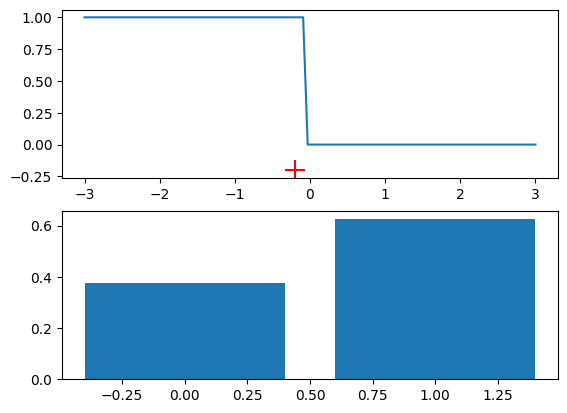

In [93]:
# 참조
# n_features=1,       # 독립변수 갯수
# n_informative=1,     # 타겟변수에 영향주는 독립변수 갯수
x = [[-0.2,-0.2]]
plt.subplot(211)
plt.plot(xx, y_hat)
plt.scatter(x[0][0], x[0][1], s=200, c='r', marker='+')
prob = model.predict_proba(x)[0]
plt.subplot(212)
plt.bar(model.classes_, prob)
plt.show()

## 4-2 의사결정나무

- 여러가지 규칙을 순차적으로 적용하면서 독립변수 공간을 분할하는 분류모형
- 종속 변수에 영향을 주는 독립변수들을 알아보는 목적
- 

In [116]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:] # petal_langth, petal_width
# data.target_names[data.target]
y = data.target
# data.feature_names[2:]  # cm빼기
feature_names = [name[:-5].replace(' ','_') for name in data.feature_names[2:]]

In [117]:
import numpy as np
np.c_[X,y]

array([[1.4, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.7, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.1, 0. ],
       [1.5, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.1, 0.1, 0. ],
       [1.2, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.3, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.7, 0.3, 0. ],
       [1.5, 0.3, 0. ],
       [1.7, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1. , 0.2, 0. ],
       [1.7, 0.5, 0. ],
       [1.9, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.4, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.5, 0.1, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.2, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.3, 0.3, 0. ],
       [1.3, 0.3

In [118]:
# 모형
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',  # 품질 기준을 entropy
                                 max_depth=1,
                                 random_state=0)
dt_model.fit(X,y)   # detph 1짜리 tree라 성능이 좋지 않을 듯

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [126]:
test_x = [[1.4,0.2]]
dt_model.predict(X)
dt_model.predict(test_x)

array([0])

생성된 tree 구조

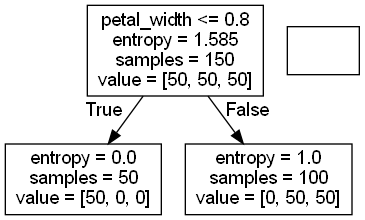

In [128]:
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image
import io
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model,feature_names=feature_names)

In [130]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
        
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

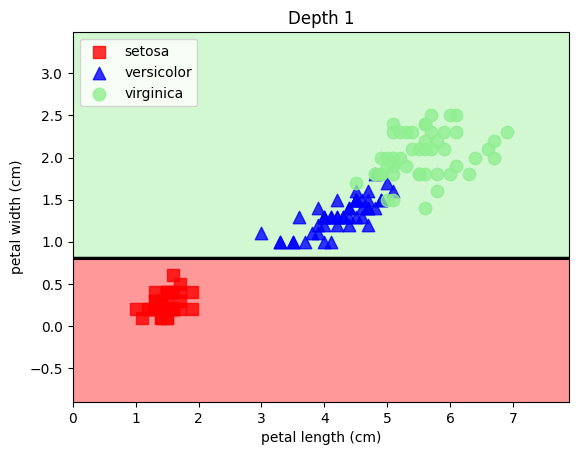

In [132]:
plot_decision_regions(X,y,dt_model,"Depth 1")
plt.show()

In [133]:
# depth 5 짜리
dt_model5 = DecisionTreeClassifier(criterion='entropy',  # 품질 기준을 entropy
                                 max_depth=5,
                                 random_state=0)
dt_model5.fit(X,y)   # detph 5

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

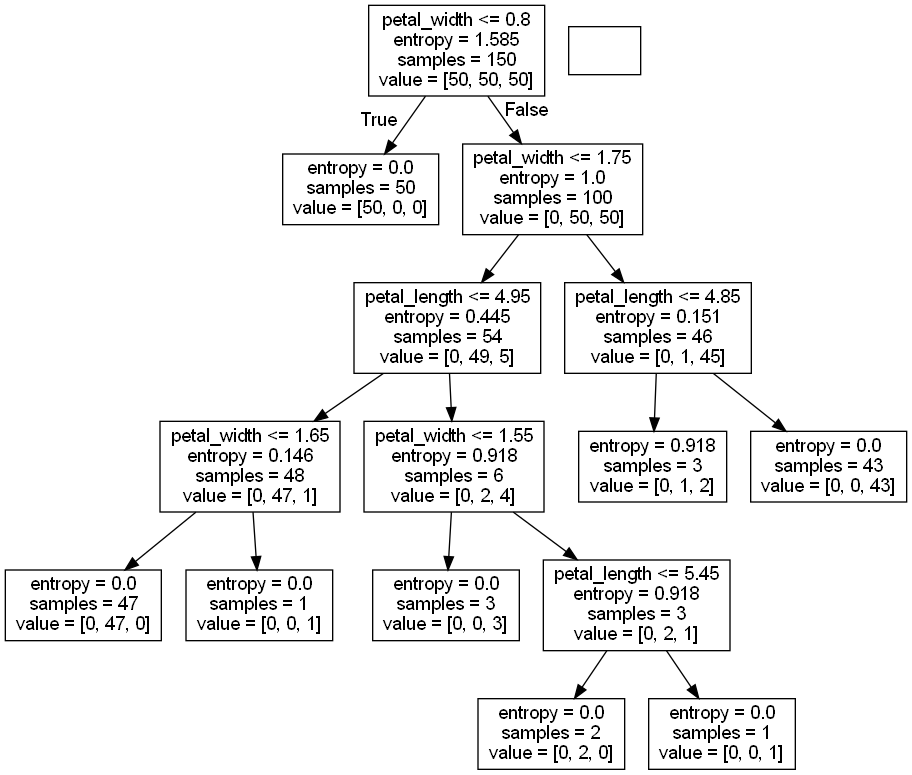

In [134]:
draw_decision_tree(dt_model5,feature_names=feature_names)

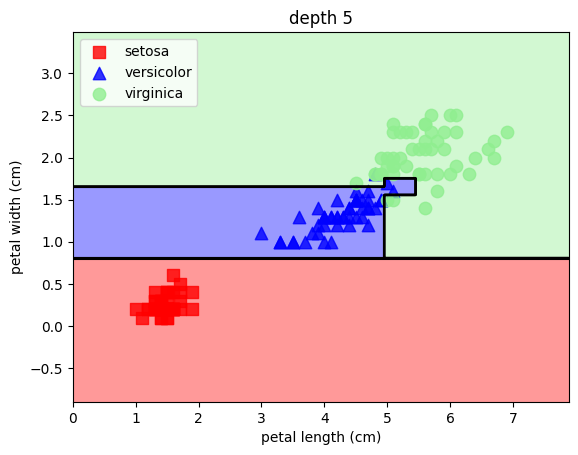

In [135]:
plot_decision_regions(X,y,dt_model5,"depth 5")
plt.show()

In [136]:
dt_model5.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절. 모형 3 : 판별함수 모형

- 동일한 클래스가 모여있는 영역과 그 영역을 나누는 경계면을 정의
- decision_function()지공
- 퍼셉트론,  SVN, 인공신경망모형(일부는 predict_proba도 있음)

## 5-1 Perceptron

In [142]:
iris = load_iris()
# 0, 2 (setosa,virginica)
     #idx => 0~49,100149
idx = np.in1d(iris.target,[0,2])
import pandas as pd
idx = pd.Series(iris.target).isin([0,2]).values

In [144]:
X = iris.data[idx,0:2]
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [146]:
# 퍼셉트론 모형
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=500, # epoch 500회
                   eta0=0.1,       # learning rate
                   random_state=1).fit(X,y)

In [147]:
y_hat = model.predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [149]:
(y != y_hat).sum()

1

In [150]:
# 예측값이 틀린 경우
X[y != y_hat]

array([[4.5, 2.3]])

In [152]:
for idx, (real,hat) in enumerate(zip(y,y_hat)):
    #print(idx,real,hat)
    if real!=hat:
        print(f"{idx}번째 실제값 :{real}, 예측값:{hat} = 데이터 : {X[idx]}")

41번째 실제값 :0, 예측값:2 = 데이터 : [4.5 2.3]


In [158]:
test_x = X[41].reshape(1,-1)     # 자주 씀
test_x = X[41][np.newaxis,:]     # 제일 많이 씀
test_x = np.expand_dims(X[41],axis=0)
test_x = X[41][None,:]
print(model.predict(test_x))
print(model.decision_function(test_x))

[2]
[1.24]


In [161]:
test_x = X[50].reshape(1,-1)
test_x
print(model.decision_function(test_x))

[2.028]


## 5-2 SVC
- support Vector Classifier

In [169]:
from sklearn.svm import SVC
model = SVC(
    #probability=True   # probability=True 입력해야 됨
)
model.fit(X,y)

SVC()

In [172]:
test_x = X[41].reshape(1,-1)
print(test_x)
print('예측 :',model.predict(test_x))
print('경계면과의 거리 : ',model.decision_function(test_x))
# print('예측 확률들 : ',model.predict_proba(test_x))  # probability=True 입력해야 됨

[[4.5 2.3]]
예측 : [0]
경계면과의 거리 :  [-0.72539221]


## 5-3 다중 퍼셉트론(인공신경망)

- predict /  predict_proba /predict_log_proba

In [183]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_X.shape,iris_y.shape
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(iris_X,iris_y,
                                                test_size=0.3,
                                                random_state=1,
                                                stratify=iris_y) # 층화추출

In [184]:
# 다중 퍼셉트론 모형
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30), # hidden layer의 unit수
                   max_iter=500)  # epoch
mlp.fit(train_X,train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [185]:
pred = mlp.predict(test_X)
pd.crosstab(test_y,pred)

col_0,0,1,2
row_0,,,
0,15,0,0
1,0,15,0
2,0,0,15


# 6절. 분류모형 성능평가

## 6-1  sklearn의 모형 평가 방법 
- metrics 모듈 : ~ score
- 혼돈행렬을 이용

In [186]:
result = pd.read_csv('data/model_result.csv')  # 보험사기인지 여부(실제값/예측값})
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CUST_ID  1793 non-null   int64
 1   y_true   1793 non-null   int64
 2   y_pred   1793 non-null   int64
dtypes: int64(3)
memory usage: 42.1 KB


In [188]:
# 실제 보험 사기자, 보험사기자로 예측
result['y_true'].sum(),result['y_pred'].sum()

(158, 99)

In [189]:
pd.crosstab(result.y_true,result.y_pred,margins=True)

y_pred,0,1,All
y_true,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [190]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score

```
         예측0    예측1
실제 0    TN       FP(1종오류)
실제 1    FN       TP
```

In [191]:
confusion_matrix(result.y_true,result.y_pred)

array([[1613,   22],
       [  81,   77]], dtype=int64)

In [192]:
accuracy_score(result.y_true,result.y_pred)  # 정확도 (전체적으로 얼마나 맞췄는지)

0.9425543781372002

In [193]:
precision_score(result.y_true,result.y_pred) # 정밀도(1로 예측한 것 중 얼마나 맞췄는지)

0.7777777777777778

In [194]:
recall_score(result.y_true,result.y_pred)   # 재현율(살재로 1 중 얼마나 맞췄는지) pos_label=1 (기본값)

0.4873417721518987

In [195]:
recall_score(result.y_true,result.y_pred,pos_label=0) # 특이도(실제로 0 중 얼마나 맞췄는지?)

0.9865443425076452

In [196]:
# 위양성률(fallout : FPrate) : FP/(TN+FP)  : 1종 오류 = 1- 특이도 : 낮을수록 좋음
1 - recall_score(result.y_true,result.y_pred,pos_label=0)

0.013455657492354778

In [198]:
f1_score(result.y_true,result.y_pred)    # recall과  precision의 조화평균

0.5992217898832685

In [201]:
# beta=1 : f1_score(recall과 precision의 중요도를 똑같이)
print(fbeta_score(result.y_true,result.y_pred,beta=1))
# beta=0.5 : precision의 가중치를 높음(고객의 만족도가 중요)
print(fbeta_score(result.y_true,result.y_pred,beta=0.5))
# beta=2 : recall의 가중치가 높음(회사의 비용이 중요)
print(fbeta_score(result.y_true,result.y_pred,beta=2))

0.5992217898832685
0.6949458483754513
0.5266757865937073


## 6-2. ROC커브를 이용한 성능 비교
- 위양성률(FPrate)과 재현율(TPrate)의 변화를 시각화 = 모델이 양성을 잘맞추는 능력(TPrate)과 잘못 예측하는 빙ㅍㄹ(FPrate)을 비교하는 곡선
- 세로축(재현율)   => 높은게 좋음
- 가로축(위양성율) => 낮은게 좋음

In [2]:
#61p
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                          #n_features=20,
                          weights=[0.95,0.05],   # 0과 1의 비율
                          #n_classes=2,
                          random_state=5)
y.sum()

57

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [15]:
# decision_function()이 없는 모델 : predict_proba
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=42).fit(X,y)
pred3 = model3.predict(X)
pd.crosstab(y,pred3)

col_0,0,1
row_0,,
0,943,0
1,0,57


In [6]:
import pandas as pd
model1 = LogisticRegression().fit(X,y)

In [7]:
model2 = SVC(gamma=0.0001, C=3000,probability=True).fit(X,y)

In [8]:
pred1 = model1.predict(X)
pd.crosstab(y,pred1,rownames=['실제값'],colnames=['예측값'])

예측값,0,1
실제값,,
0,940,3
1,30,27


In [9]:
pred2 = model2.predict(X)
pd.crosstab(y,pred2,rownames=['실제값'],colnames=['예측값'])

예측값,0,1
실제값,,
0,940,3
1,30,27


In [18]:
# 1로 구분될 확률
# model3.predict_proba(X)[:,1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
from sklearn.metrics import roc_curve
fpr1,tpr1,tresholds1 = roc_curve(y, model1.decision_function(X))
fpr2,tpr2,tresholds2 = roc_curve(y, model2.decision_function(X))
fpr3,tpr3,tresholds3 = roc_curve(y, model3.predict_proba(X)[:,1])

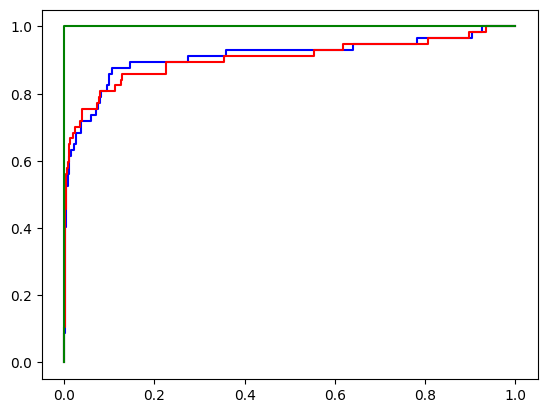

In [20]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,c='b')
plt.plot(fpr2,tpr2,c='r')
plt.plot(fpr3,tpr3,c='g')
plt.show()

## 6-3 두 모형의 혼돈행렬이 같은 경우
- roc_curve로도 우열을 가라기 힘든 경우 : auc
    * auc = 1   : 완벽한 모델
    * auc = 0.5 : 무작위 모델
    * auc < 0.5 : 오히려 반대로 예측하는 경향이 있는 최악의 모델

In [21]:
# decision_function이 있어 fpr , tpr 구한 경우 : roc_curve로부터 얻은 fpr , tpr 값으로 auc
from sklearn.metrics import auc
auc(fpr1,tpr1), auc(fpr2,tpr2), auc(fpr3,tpr3)

(0.9112202563673234, 0.9037227214377407, 1.0)